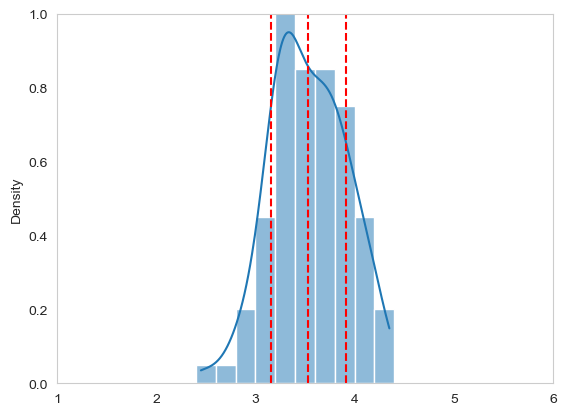

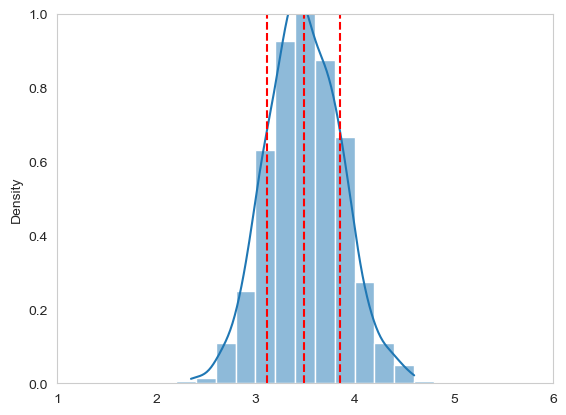

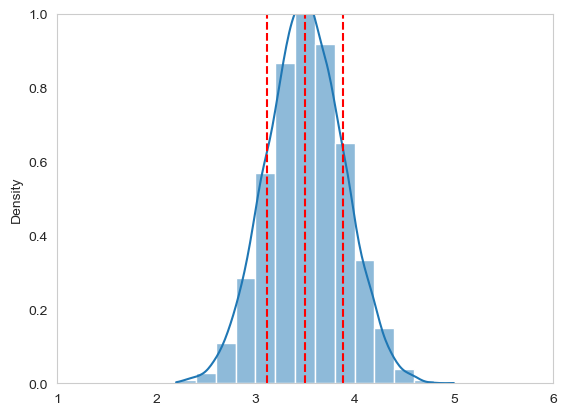

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mean_array = []
num_dices  = 20 # n = 5, 10, 20  色子数
num_trials = 10000  # 掷色子次数

# each trial: 10 dices and calculate mean
for i in np.arange(num_trials):
    
    # 掷色子结果
    sample_i = np.random.randint(low = 1, 
                                 high = 6 + 1, 
                                 size=(num_dices))
    
    # 平均值
    mean_i   = sample_i.mean()
    mean_array.append(mean_i)

# plot the histogram of mean values at 50, 500, 5000 trials

for j in [100,1000,10000]: # m
    
    # 截取
    mean_array_j = mean_array[0:j]
    
    fig, ax = plt.subplots()
    
    # 绘制直方图
    sns.histplot(mean_array_j, kde = True,
                 stat="density",
                 binrange = [1,6],
                 binwidth = 0.2)
    
    mean_array_j = np.array(mean_array_j)
    
    mu_mean_array_j = mean_array_j.mean()
    
    ax.axvline(x = mu_mean_array_j,
               color = 'r',linestyle = '--')
    
    sigma_mean_array_j = mean_array_j.std() 
    
    ax.axvline(x = mu_mean_array_j + sigma_mean_array_j,
               color = 'r',linestyle = '--')
    
    ax.axvline(x = mu_mean_array_j - sigma_mean_array_j,
               color = 'r',linestyle = '--')
    
    plt.xlim(1,6)
    plt.ylim(0,1)
    plt.grid()

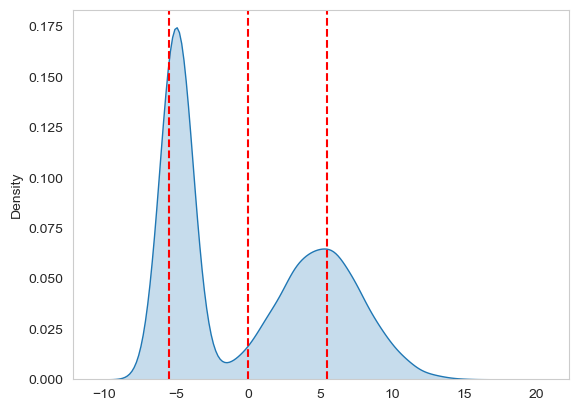

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a population
num_population = 100000  
# 生成数据
X1 = np.random.normal(loc=-5, scale=1.0, size=int(num_population / 2))
X2 = np.random.normal(loc=5, scale=3, size=int(num_population / 2))
# 合成双峰数据
X = np.concatenate((X1, X2), axis=None)

fig, ax = plt.subplots()

sns.kdeplot(X, fill=True)

mu_X = X.mean()

ax.axvline(x=mu_X, color='r', linestyle='--')

sigma_X = X.std()

ax.axvline(x=mu_X + sigma_X, color='r', linestyle='--')

ax.axvline(x=mu_X - sigma_X, color='r', linestyle='--')

plt.grid()


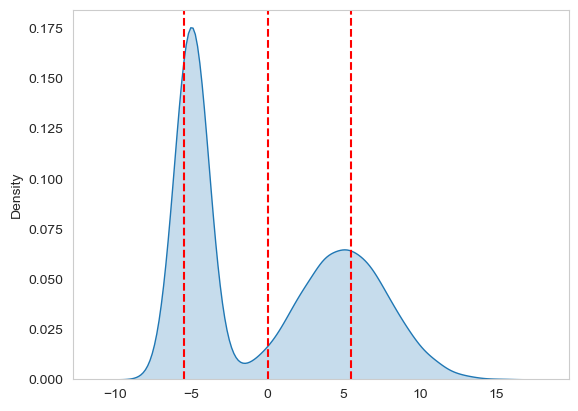

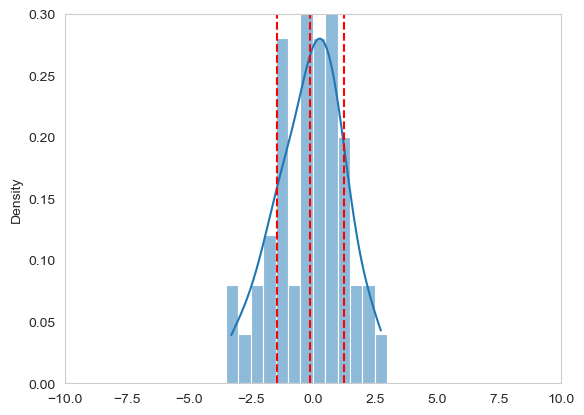

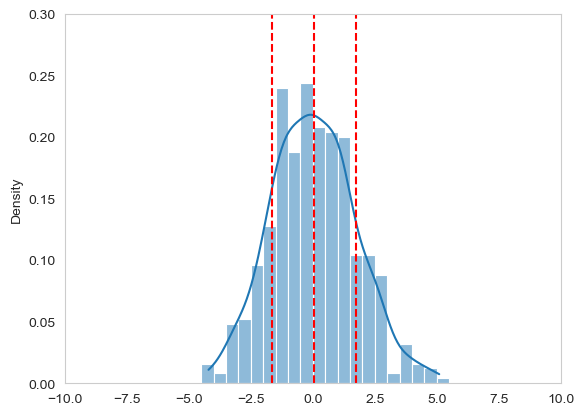

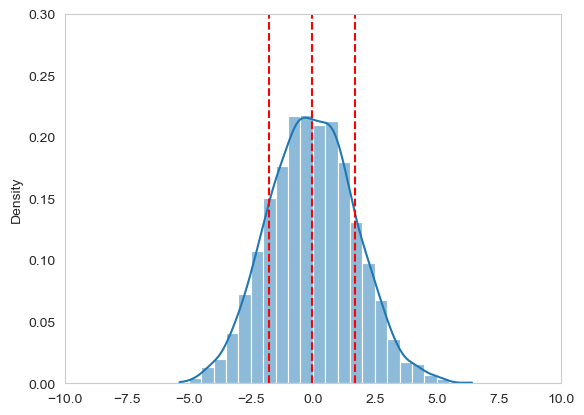

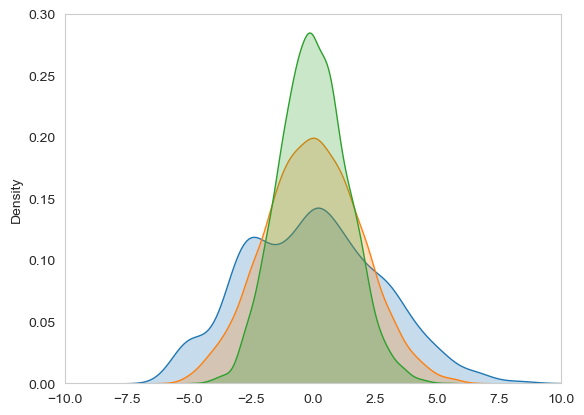

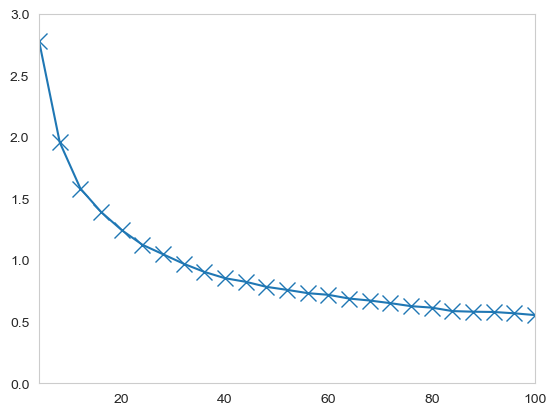

In [7]:
num_draws = 10  # 抽取的个数
num_trials = 5000  # 实验总次数

mean_array = []

# each trial: 10 dices and calculate mean
for i in np.arange(num_trials):
    
    # 随机抽取数据
    indice_i = np.random.randint(low=0,
                                 high=num_population,
                                 size=(num_draws))
    sample_i = X[indice_i]
    
    # 计算平均值
    mean_i = sample_i.mean()
    mean_array.append(mean_i)

# plot the histogram of mean values at 50, 500, 5000 trials

for j in [50, 500, 5000]:  # m

    mean_array_j = mean_array[0:j]

    fig, ax = plt.subplots()

    sns.histplot(mean_array_j, kde=True,
                 stat="density",
                 binrange=[-10, 10],
                 binwidth=0.5)

    mean_array_j = np.array(mean_array_j)

    mu_mean_array_j = mean_array_j.mean()

    ax.axvline(x=mu_mean_array_j, color='r', linestyle='--')

    sigma_mean_array_j = mean_array_j.std()

    ax.axvline(x=mu_mean_array_j + sigma_mean_array_j, color='r', linestyle='--')

    ax.axvline(x=mu_mean_array_j - sigma_mean_array_j, color='r', linestyle='--')

    plt.xlim(-10, 10)
    plt.ylim(0, 0.3)
    plt.grid()


num_trials = 5000

fig, ax = plt.subplots()

# each trial: 10 dices and calculate mean
for num_draws in [4, 8, 16]:

    mean_array = []

    for i in np.arange(num_trials):
        # 随机抽取数据
        indice_i = np.random.randint(low=0,
                                     high=num_population,
                                     size=(num_draws))
        sample_i = X[indice_i]
        # 计算平均值
        mean_i = sample_i.mean()
        mean_array.append(mean_i)

        # finishing the generation of mean array

    sns.kdeplot(mean_array, fill=True)

plt.xlim(-10, 10)
plt.ylim(0, 0.3)
plt.grid()

num_trials = 5000

SE_array = []

n_array = np.linspace(4, 100, 25)

for num_draws in n_array:

    mean_array = []

    for i in np.arange(num_trials):
        # 随机抽取数据
        indice_i = np.random.randint(low=0,
                                     high=num_population,
                                     size=(int(num_draws)))
        sample_i = X[indice_i]
        # 平均值
        mean_i = sample_i.mean()
        mean_array.append(mean_i)

        # finishing the generation of mean array

    mean_array = np.array(mean_array)
    # 计算方差
    SE_i = mean_array.std()
    SE_array.append(SE_i)

fig, ax = plt.subplots()

plt.plot(n_array, SE_array, marker='x', markersize=12)
plt.xlim(4, 100)
plt.ylim(0, 3)
plt.grid()

In [9]:
import numpy as np
from sympy import symbols, ln, simplify, lambdify, diff, solve, Float
import matplotlib.pyplot as plt

# 定义变量
theta_1, theta_2 = symbols('theta_1 theta_2')

samples = [-2.5, -5, 1, 3.5, -4, 1.5, 5.5]
# 均值
mu = np.mean(samples)

print(mu)

n = len(samples)
# 标准差
bias_std = np.std(samples)
# 方差
bias_var = bias_std ** 2
print(bias_var)

A = 0
for i in np.arange(n):
    term_i = (samples[i] - theta_1) ** 2
    A = A + term_i

A = simplify(A)
print(A)

# 对数似然函数
lnL = -n / 2 * np.log(2 * np.pi) - n / 2 * ln(theta_2) - 1 / 2 / theta_2 * A

lnL = simplify(lnL)

print(lnL)


0.0
13.285714285714288
7.0*theta_1**2 + 93.0
(-3.5*theta_1**2 + theta_2*(-3.5*log(theta_2) - 6.43256973243271) - 46.5)/theta_2


In [10]:
theta_1_array = np.linspace(mu - 3, mu + 3, 40)
theta_2_array = np.linspace(bias_var * 0.8, bias_var * 1.2, 40)

theta_11, theta_22 = np.meshgrid(theta_1_array, theta_2_array)
# 转换为可调用函数
lnL_fcn = lambdify((theta_1, theta_2), lnL)
# 计算对数似然函数值
lnL_matrix = lnL_fcn(theta_11, theta_22)

# first-order partial differential
# 对 theta_1 求导
df_dtheta_1 = diff(lnL, theta_1)
print(df_dtheta_1)

# 对 theta_2 求导
df_dtheta_2 = diff(lnL, theta_2)
print(df_dtheta_2)

# solution of (theta_1,theta_2)
# 求解
sol = solve([df_dtheta_1, df_dtheta_2], [theta_1, theta_2])

print(sol)

theta_1_star = sol[0][0]
theta_2_star = sol[0][1]

# evalf(): 将符号表达式转换为具体的数值
theta_1_star = theta_1_star.evalf()
theta_2_star = str(theta_2_star)
theta_2_star = eval(theta_2_star)

print(theta_1_star)
print(theta_2_star)

lnL_min = lnL_fcn(theta_1_star, theta_2_star)
print(lnL_min)


-7.0*theta_1/theta_2
(-3.5*log(theta_2) - 9.93256973243271)/theta_2 - (-3.5*theta_1**2 + theta_2*(-3.5*log(theta_2) - 6.43256973243271) - 46.5)/theta_2**2
[(0.0, 13.2857142857143)]
0
13.2857142857143
-18.9859824367755


0.0
13.285714285714288
7.0*theta_1**2 + 93.0
(-3.5*theta_1**2 + theta_2*(-3.5*log(theta_2) - 6.43256973243271) - 46.5)/theta_2
-7.0*theta_1/theta_2
(-3.5*log(theta_2) - 9.93256973243271)/theta_2 - (-3.5*theta_1**2 + theta_2*(-3.5*log(theta_2) - 6.43256973243271) - 46.5)/theta_2**2
[(0.0, 13.2857142857143)]
0
13.2857142857143
-18.9859824367755


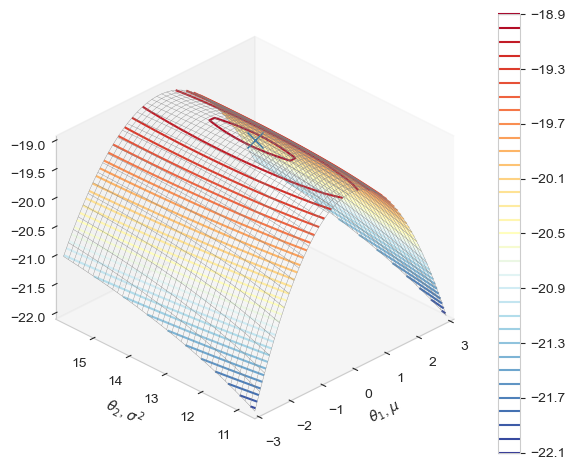

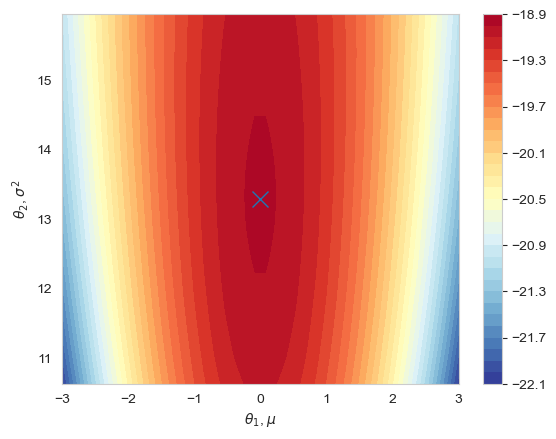

In [3]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(theta_11, theta_22, lnL_matrix,
                  color=[0.5, 0.5, 0.5],
                  linewidth=0.25)

plt.plot(theta_1_star, theta_2_star, lnL_min,
         marker='x', markersize=12)

colorbar = ax.contour(theta_11, theta_22, lnL_matrix, 30,
                      cmap='RdYlBu_r')

fig.colorbar(colorbar, ax=ax)

ax.set_proj_type('ortho')

ax.set_xlabel('$\\theta_1$, $\\mu$')
ax.set_ylabel('$\\theta_2$, $\\sigma^2$')

plt.tight_layout()
ax.set_xlim(theta_11.min(), theta_11.max())
ax.set_ylim(theta_22.min(), theta_22.max())

ax.view_init(azim=-135, elev=30)

ax.grid(False)
plt.show()

fig, ax = plt.subplots()

colorbar = ax.contourf(theta_11, theta_22, lnL_matrix, 30, cmap='RdYlBu_r')
fig.colorbar(colorbar, ax=ax)
plt.plot(theta_1_star, theta_2_star, marker='x', markersize=12)

ax.set_xlim(theta_11.min(), theta_11.max())
ax.set_ylim(theta_22.min(), theta_22.max())

ax.set_xlabel('$\\theta_1$, $\\mu$')
ax.set_ylabel('$\\theta_2$, $\\sigma^2$')
# plt.gca().set_aspect('equal', adjustable='box')

plt.show()

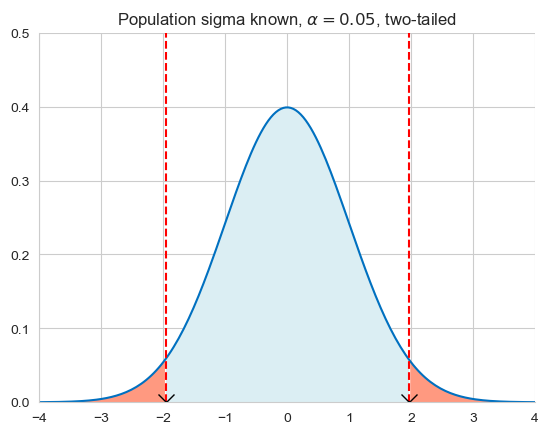

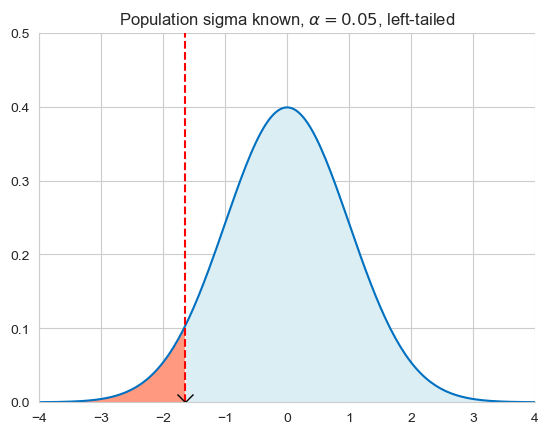

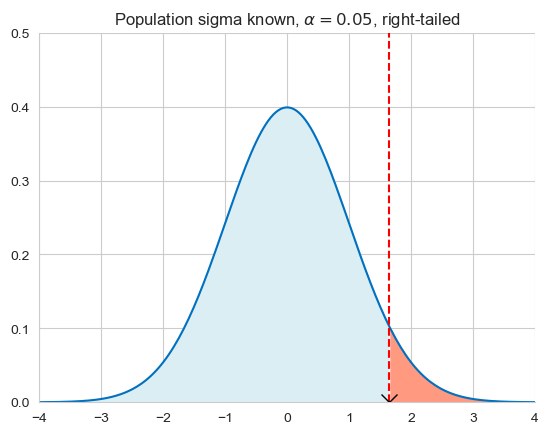

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 生成数据
x = np.linspace(start=-4, stop=4, num=200)
# 计算 PDF
f_x = stats.norm.pdf(x)  # PDF of standard normal distribution

# 显著性水平
alpha = 0.05

# population standard deviation is known, or large sample size
# stats.norm.ppf 用于计算标准正态分布下给定累积概率的百分位点，这里计算了双尾检验的临界值
crit_value = stats.norm.ppf(q=1 - alpha / 2)

fig, ax = plt.subplots()

plt.plot(x, f_x, color="#0070C0")

# # 使用 np.logical_and 进行逻辑与运算
plt.fill_between(x[np.logical_and(x >= -crit_value, x <= crit_value)],
                 f_x[np.logical_and(x >= -crit_value, x <= crit_value)],
                 color="#DBEEF3")

ax.axvline(x=crit_value, color='r', linestyle='--')
plt.plot(crit_value, 0, marker='x', color='k', markersize=12)
ax.axvline(x=-crit_value, color='r', linestyle='--')
plt.plot(-crit_value, 0, marker='x', color='k', markersize=12)

plt.fill_between(x[x <= -crit_value], f_x[x <= -crit_value], color="#FF9980")
plt.fill_between(x[x >= crit_value], f_x[x >= crit_value], color="#FF9980")

plt.title("Population sigma known, $\\alpha = 0.05$, two-tailed")

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

crit_value = stats.norm.ppf(q=1 - alpha)

fig, ax = plt.subplots()

plt.plot(x, f_x, color="#0070C0")

plt.fill_between(x[x >= -crit_value],
                 f_x[x >= -crit_value],
                 color="#DBEEF3")

ax.axvline(x=-crit_value, color='r', linestyle='--')
plt.plot(-crit_value, 0, marker='x', color='k', markersize=12)

plt.fill_between(x[x <= -crit_value],
                 f_x[x <= -crit_value],
                 color="#FF9980")

plt.title("Population sigma known, $\\alpha = 0.05$, left-tailed")

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

crit_value = stats.norm.ppf(q=1 - alpha)

fig, ax = plt.subplots()

plt.plot(x, f_x, color="#0070C0")

plt.fill_between(x[x <= crit_value],
                 f_x[x <= crit_value],
                 color="#DBEEF3")

ax.axvline(x=crit_value, color='r', linestyle='--')
plt.plot(crit_value, 0, marker='x', color='k', markersize=12)

plt.fill_between(x[x >= crit_value],
                 f_x[x >= crit_value],
                 color="#FF9980")

plt.title("Population sigma known, $\\alpha = 0.05$, right-tailed")

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

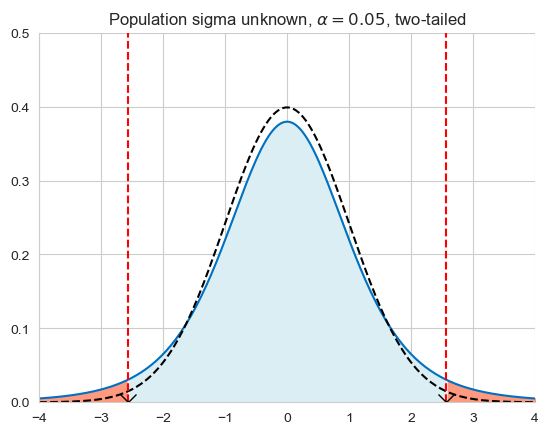

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 生成数据
x = np.linspace(start=-4, stop=4, num=200)
# In practice, population standard deviation is rarely known
# 定义自由度
n = 6
# 计算 t 分布的值
f_x_t = stats.t.pdf(x, df=n - 1)
# PDF of student t distribution
# 计算正态分布的值
f_x_norm = stats.norm.pdf(x)

alpha = 0.05
# stats.norm.ppf 用于计算标准正态分布下给定累积概率的百分位点，这里计算了双尾检验的临界值
crit_value = stats.t.ppf(q=1 - alpha / 2, df=n - 1)

fig, ax = plt.subplots()

plt.plot(x, f_x_t, color="#0070C0")
plt.plot(x, f_x_norm, color="k", linestyle='--')

plt.fill_between(x[np.logical_and(x >= -crit_value, x <= crit_value)],
                 f_x_t[np.logical_and(x >= -crit_value, x <= crit_value)],
                 color="#DBEEF3")

ax.axvline(x=crit_value, color='r', linestyle='--')
plt.plot(crit_value, 0, marker='x', color='k', markersize=12)
ax.axvline(x=-crit_value, color='r', linestyle='--')
plt.plot(-crit_value, 0, marker='x', color='k', markersize=12)

plt.fill_between(x[x <= -crit_value], f_x_t[x <= -crit_value], color="#FF9980")
plt.fill_between(x[x >= crit_value], f_x_t[x >= crit_value], color="#FF9980")

plt.title("Population sigma unknown, $\\alpha = 0.05$, two-tailed")

ax.set_xlim(-4, 4)


ax.set_ylim(0, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

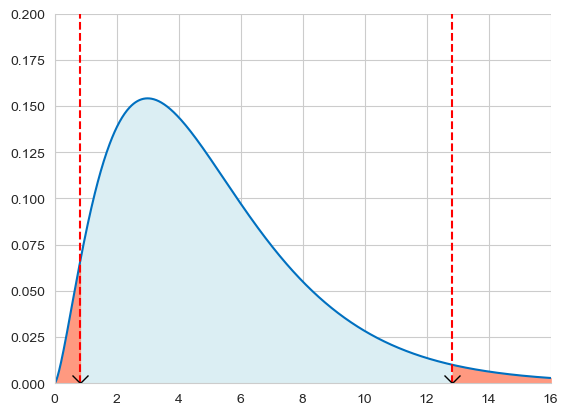

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(start=0, stop=16, num=1000)
# In practice, population standard deviation is rarely known
# 自由度
n = 6
# 卡方分布
f_x_chi2 = stats.chi2.pdf(x, df=n - 1)
# 显著性水平
alpha = 0.05

crit_value_right = stats.chi2.ppf(q=1 - alpha / 2, df=n - 1)
crit_value_left = stats.chi2.ppf(q=alpha / 2, df=n - 1)

fig, ax = plt.subplots()

plt.plot(x, f_x_chi2, color="#0070C0")

plt.fill_between(x[np.logical_and(x >= crit_value_left, x <= crit_value_right)],
                 f_x_chi2[np.logical_and(x >= crit_value_left, x <= crit_value_right)],
                 color="#DBEEF3")

ax.axvline(x=crit_value_right, color='r', linestyle='--')
plt.plot(crit_value_right, 0, marker='x', color='k', markersize=12)
ax.axvline(x=crit_value_left, color='r', linestyle='--')
plt.plot(crit_value_left, 0, marker='x', color='k', markersize=12)

plt.fill_between(x[np.logical_and(x >= 0, x <= crit_value_left)],
                 f_x_chi2[np.logical_and(x >= 0, x <= crit_value_left)],
                 color="#FF9980")

plt.fill_between(x[np.logical_and(x <= x.max(), x >= crit_value_right)],
                 f_x_chi2[np.logical_and(x <= x.max(), x >= crit_value_right)],
                 color="#FF9980")

ax.set_xlim(0, 16)
ax.set_ylim(0, 0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)